In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [31]:

def rk4_step(f, x, Y, h):
    k1 = f(x, Y)
    k2 = f(x + h/2, Y + h/2 * k1)
    k3 = f(x + h/2, Y + h/2 * k2)
    k4 = f(x + h, Y + h * k3)
    return Y + (h/6)*(k1 + 2*k2 + 2*k3 + k4)

def integrate_ode4(f, x_range, Y0, num_points):
    a, b = x_range
    h = (b - a) / (num_points - 1)
    xs = np.linspace(a, b, num_points)
    Ys = np.zeros((num_points, len(Y0)))
    Ys[0] = Y0

    for i in range(1, num_points):
        Ys[i] = rk4_step(f, xs[i-1], Ys[i-1], h)

    return xs, Ys

# Shooting method for second-order ODE: y'' + p(x)y' + q(x)y = r(x)
def shooting_method4(p_func, q_func, r_func, a, b, y_a, y_b, num_points=1000):
    # Define the system using y and z (where z = dy/dx)
    def ode_system(x, Y):
        y, z = Y  # z = dy/dx
        dy_dx = z
        dz_dx = -p_func(x)*z - q_func(x)*y + r_func(x)
        return np.array([dy_dx, dz_dx])
    
    # IVP 1: y'(a) = 0
    x1, Y1 = integrate_ode4(ode_system, (a, b), [y_a, 0], num_points)
    
    # IVP 2: y'(a) = 1
    x2, Y2 = integrate_ode4(ode_system, (a, b), [y_a, 1], num_points)

    y1_b = Y1[-1, 0]
    y2_b = Y2[-1, 0]

    # Compute h using linear interpolation
    lambda_ = (y_b - y1_b) / (y2_b - y1_b)
    y_comb = Y1[:, 0] + lambda_ * (Y2[:, 0] - Y1[:, 0])
 
    return x1, y_comb, lambda_, Y1[:, 0], Y2[:, 0]



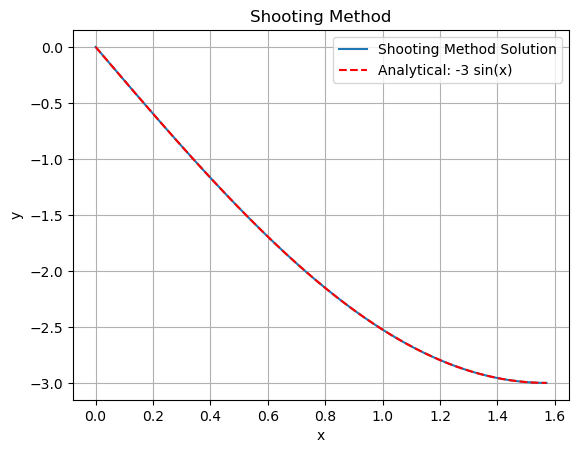

Shooting Method Scaling Factor h = -3.000000
Error at x = pi/2: 0.000000e+00


In [32]:
#Q1 y'' = -y, y(0)=0, y(pi/2) = -3
p = lambda x: 0
q = lambda x: 1
r = lambda x: 0

a = 0
b = np.pi / 2
y_a = 0
y_b = -3

x_vals, y_vals, h, y1_vals, y2_vals = shooting_method4(p, q, r, a, b, y_a, y_b, num_points=1000)

# Plotting
plt.plot(x_vals, y_vals, label='Shooting Method Solution')
plt.plot(x_vals, -3*np.sin(x_vals), 'r--', label='Analytical: -3 sin(x)')
plt.legend()
plt.xlabel('x')
plt.ylabel('y')
plt.title('Shooting Method')
plt.grid(True)
plt.show()

# Print results
print(f"Shooting Method Scaling Factor h = {h:.6f}")
print(f"Error at x = pi/2: {y_vals[-1] - y_b:.6e}")


In [33]:
#Q2

def rk2_step(f, x, Y, h):
    k1 = f(x, Y)
    k2 = f(x + h/2, Y + h/2 * k1)
    return Y + h * k2

def integrate_ode2(f, x_range, Y0, num_points):
    a, b = x_range
    h = (b - a) / (num_points - 1)
    xs = np.linspace(a, b, num_points)
    Ys = np.zeros((num_points, len(Y0)))
    Ys[0] = Y0

    for i in range(1, num_points):
        Ys[i] = rk2_step(f, xs[i-1], Ys[i-1], h)

    return xs, Ys

# Shooting method for second-order ODE: y'' + p(x)y' + q(x)y = r(x)
def shooting_method2(p_func, q_func, r_func, a, b, y_a, y_b, num_points=1000):
    # Define the system using y and z (where z = dy/dx)
    def ode_system(x, Y):
        y, z = Y  # z = dy/dx
        dy_dx = z
        dz_dx = -p_func(x)*z - q_func(x)*y + r_func(x)
        return np.array([dy_dx, dz_dx])
    
    # IVP 1: y'(a) = 0
    x1, Y1 = integrate_ode2(ode_system, (a, b), [y_a, 0], num_points)
    
    # IVP 2: y'(a) = 1
    x2, Y2 = integrate_ode2(ode_system, (a, b), [y_a, 1], num_points)

    y1_b = Y1[-1, 0]
    y2_b = Y2[-1, 0]

    # Compute h using linear interpolation
    lambda_ = (y_b - y1_b) / (y2_b - y1_b)
    y_comb = Y1[:, 0] + lambda_ * (Y2[:, 0] - Y1[:, 0])
 
    return x1, y_comb, lambda_, Y1[:, 0], Y2[:, 0]



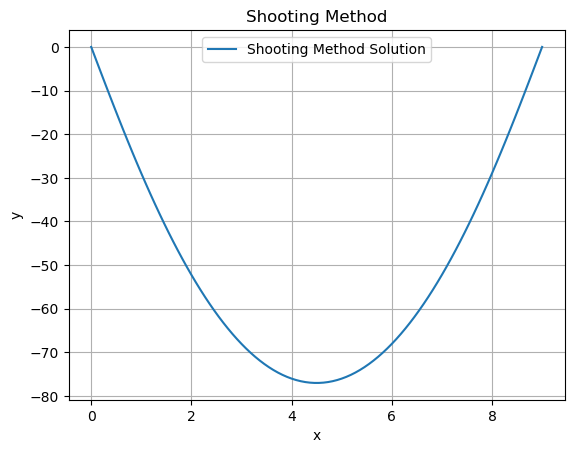

Shooting Method Scaling Factor h = -30.332199
Error at x = pi/2: 0.000000e+00


In [34]:
p = lambda x: 0
q = lambda x: -2
r = lambda x: 8 * x * (9 - x)

a = 0
b = 9
y_a = 0
y_b = 0

x_vals, y_vals, h, y1_vals, y2_vals = shooting_method2(p, q, r, a, b, y_a, y_b, num_points=100)

# Plotting
plt.plot(x_vals, y_vals, label='Shooting Method Solution')
#plt.plot(analyticaL)
plt.legend()
plt.xlabel('x')
plt.ylabel('y')
plt.title('Shooting Method')
plt.grid(True)
plt.show()

# Print results
print(f"Shooting Method Scaling Factor h = {h:.6f}")
print(f"Error at x = pi/2: {y_vals[-1] - y_b:.6e}")


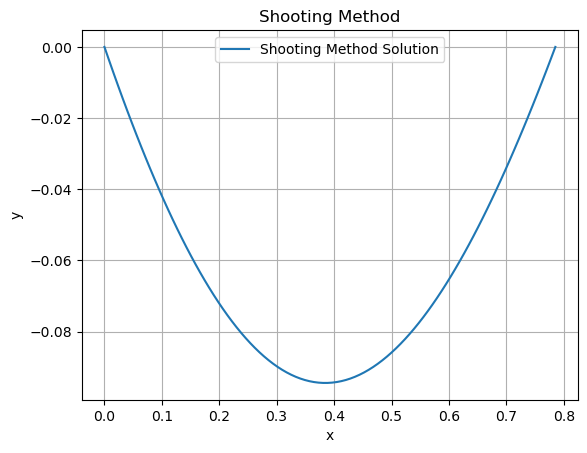

Shooting Method Scaling Factor h = -0.471405
Error at x = pi/2: 0.000000e+00


In [38]:
#Q3

p = lambda x: 0
q = lambda x: 4
r = lambda x: np.cos(x)

a = 0
b = np.pi/4
y_a = 0
y_b = 0

x_vals, y_vals, h, y1_vals, y2_vals = shooting_method4(p, q, r, a, b, y_a, y_b, num_points=100)

# Plotting
plt.plot(x_vals, y_vals, label='Shooting Method Solution')
#plt.plot(analyticaL)
plt.legend()
plt.xlabel('x')
plt.ylabel('y')
plt.title('Shooting Method')
plt.grid(True)
plt.show()

# Print results
print(f"Shooting Method Scaling Factor h = {h:.6f}")
print(f"Error at x = pi/2: {y_vals[-1] - y_b:.6e}")


In [39]:
#Q4

def rk4_step(f, x, Y, h):
    k1 = f(x, Y)
    k2 = f(x + h/2, Y + h/2 * k1)
    k3 = f(x + h/2, Y + h/2 * k2)
    k4 = f(x + h, Y + h * k3)
    return Y + (h/6)*(k1 + 2*k2 + 2*k3 + k4)

def integrate_ode4(f, x_range, Y0, num_points):
    a, b = x_range
    h = (b - a) / (num_points - 1)
    xs = np.linspace(a, b, num_points)
    Ys = np.zeros((num_points, len(Y0)))
    Ys[0] = Y0

    for i in range(1, num_points):
        Ys[i] = rk4_step(f, xs[i-1], Ys[i-1], h)

    return xs, Ys

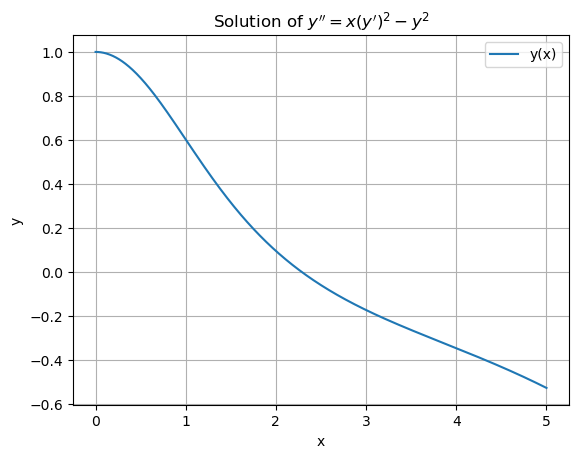

In [41]:
def system(x, Y):
    y1, y2 = Y
    dy1_dx = y2
    dy2_dx = x * y2**2 - y1**2
    return np.array([dy1_dx, dy2_dx])

# Initial conditions
Y0 = [1.0, 0.0]  # y(0) = 1, y'(0) = 0
x_range = (0, 5)
num_points = 1000

# Solve the system
xs, Ys = integrate_ode4(system, x_range, Y0, num_points)

# Plot the solution
plt.plot(xs, Ys[:, 0], label='y(x)')

plt.xlabel('x')
plt.ylabel('y')
plt.title('Solution of $y\'\' = x(y\')^2 - y^2$')
plt.legend()
plt.grid(True)
plt.show()